# kaggle Competition
## Titanic: Machine Learning from Disaster

---
データ形式

　データの形式は以下のとおり。

|**項目名**|**説明**|
|:--|:--|
|PassengerId|乗客ID|
|Survived|生死(0 = No; 1 = Yes)※trainデータのみに存在。testデータのこの値を予測する。|
|Pclass|乗客の社会階級(1 = 1st(High); 2 = 2nd(Middle); 3 = 3rd(Low))|
|Name|Name|
|Sex|性別(female = 女性 ; male = 男性)|
|Age|年齢|
|SibSp|乗船している夫婦、兄弟姉妹の数|
|Parch|乗船している親、子供の数|
|Ticket|チケットNo|
|Fare|乗船料金|
|Cabin|船室|
|Embarked|乗船場所(C = Cherbourg; Q = Queenstown; S = Southampton)|


---

In [74]:
%pylab inline --no-import-all
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\msgothic.ttc', size=14)

Populating the interactive namespace from numpy and matplotlib


#### ファイルオープンおよびデータ結合
train.csvとtest.csvのデータを結合し、すべての乗客データでデータを確認する。

In [75]:
train_df = pd.read_csv('D:\\data\\train.csv', header=0)
test_df = pd.read_csv('D:\\data\\test.csv', header=0)
titanic_df = pd.concat((train_df,test_df),axis=0,ignore_index=True)

In [76]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [77]:
titanic_df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [78]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [79]:
test_df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

**男女・階級の生存数など確認**

データの欠損数を確認する。AgeとCabinの欠損数が多い

In [80]:
titanic_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [81]:
df_group_sex = titanic_df.groupby('Sex',as_index=False)
df_group_sex.agg({'Name':'count','Age':['mean','median','std'],'Survived':['mean','sum']})

Sex  Name        Age                    Survived       
          count       mean median        std      mean    sum
0  female   466  28.687088   27.0  14.576962  0.742038  233.0
1    male   843  30.585228   28.0  14.280581  0.188908  109.0

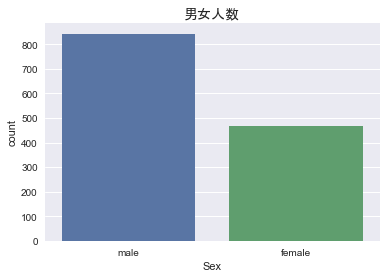

In [82]:
sns.countplot('Sex', data=titanic_df)
plt.title(u'男女人数', fontproperties=fp)

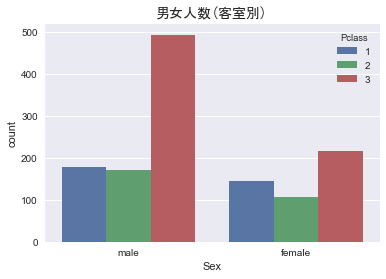

In [83]:
sns.countplot('Sex', data=titanic_df, hue='Pclass')
plt.title(u'男女人数(客室別)', fontproperties=fp)

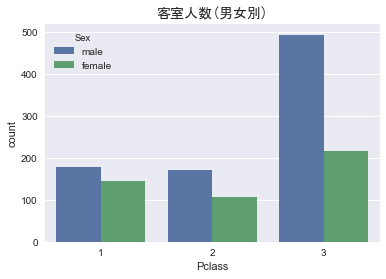

In [84]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')
plt.title(u'客室人数(男女別)', fontproperties=fp)

In [85]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 18:
        return 'child'
    else:
        return sex

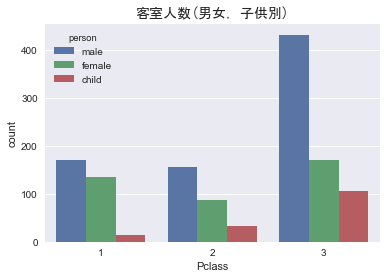

In [86]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
sns.countplot('Pclass',data=titanic_df,hue='person')
plt.title(u'客室人数(男女，子供別)', fontproperties=fp)

In [87]:
titanic_df['person'].value_counts()

male      761
female    394
child     154
Name: person, dtype: int64

1等客室、2客室には子供が少ない。3客室に多い。これで年齢分布が分かった。

**敬称から男女・既婚未婚判定**

　miss : 未婚女性, mrs : 既婚女性, master : 一般男性, mr : 子供(主に男の子)と判断できる。

In [88]:
def name_classifier(name_df):
    name_class_df = pd.DataFrame(columns={'honorific'})
    
    for name in name_df:
        if 'Miss' in name:
            df = pd.DataFrame({'honorific':['miss']})
        elif 'Mrs' in name:
            df = pd.DataFrame({'honorific':['mrs']})
        elif 'Master' in name:
            df = pd.DataFrame({'honorific':['master']})
        elif 'Mr' in name:
            df = pd.DataFrame({'honorific':['mr']})
        else :
            df = pd.DataFrame({'honorific':[np.nan]})
        name_class_df = name_class_df.append(df,ignore_index=True)
    return name_class_df

In [89]:
name_dum = name_classifier(titanic_df['Name'])
titanic_df = pd.concat((titanic_df,name_dum),axis=1)
titanic_df['honorific'].value_counts()

mr        758
miss      260
mrs       199
master     61
Name: honorific, dtype: int64

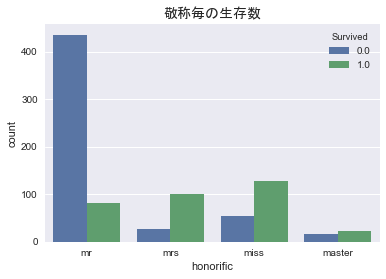

In [90]:
sns.countplot('honorific',data=titanic_df,hue='Survived')
plt.title(u'敬称毎の生存数', fontproperties=fp)

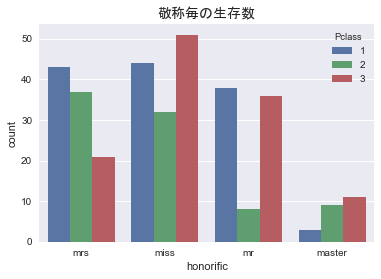

In [91]:
sns.countplot('honorific',data=titanic_df[titanic_df.Survived == 1],hue='Pclass')
plt.title(u'敬称毎の生存数', fontproperties=fp)

In [92]:
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

c:\users\usl10738\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


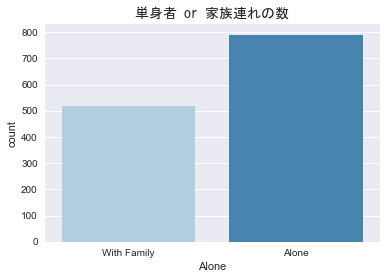

In [93]:
sns.countplot('Alone',data=titanic_df,palette='Blues')
plt.title(u'単身者 or 家族連れの数', fontproperties=fp)

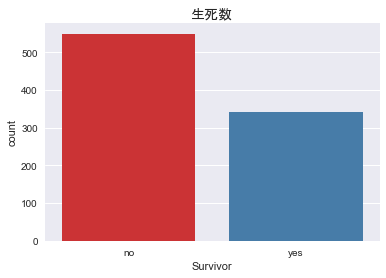

In [94]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
sns.countplot('Survivor',data=titanic_df,palette='Set1')
plt.title(u'生死数', fontproperties=fp)

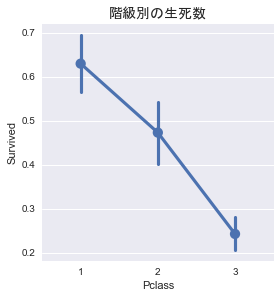

In [95]:
sns.factorplot('Pclass','Survived',data=titanic_df, order=[1,2,3])
plt.title(u'階級別の生死数', fontproperties=fp)

In [96]:
table_dum = titanic_df.pivot_table('Survived', index='Pclass', columns='person', aggfunc=sum)
table_dum

person,child,female,male
Pclass,,,
1,11.0,84.0,41.0
2,21.0,58.0,8.0
3,29.0,53.0,37.0


In [97]:
df_group_person = titanic_df.groupby('person',as_index=False)
df_group_person.agg({'Name':'count','Age':['mean','median','std'],'Survived':['mean','sum']})

person  Name        Age                    Survived       
          count       mean median        std      mean    sum
0   child   154   9.101753    9.0   6.015397  0.539823   61.0
1  female   394  33.169304   30.0  12.016747  0.752896  195.0
2    male   761  33.632812   30.0  12.375016  0.165703   86.0